# Shopping Behavior Analysis - EDA & Predictive Modeling
This notebook performs comprehensive exploratory data analysis and builds predictive models for shopping behavior data.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# ML Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans

# Settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

## 1. Data Loading & Initial Exploration

In [2]:
# Load data
df = pd.read_csv('shopping_behavior_updated.csv')
print(f"Dataset Shape: {df.shape}")
df.head(10)

Dataset Shape: (3900, 18)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [3]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
# Statistical Summary
df.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [5]:
# Check for missing values
missing = df.isnull().sum()
print("Missing Values:\n", missing[missing > 0] if missing.sum() > 0 else "No missing values")

# Check for duplicates
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

Missing Values:
 No missing values

Duplicate Rows: 0


## 2. Univariate Analysis

Numerical Columns: ['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']


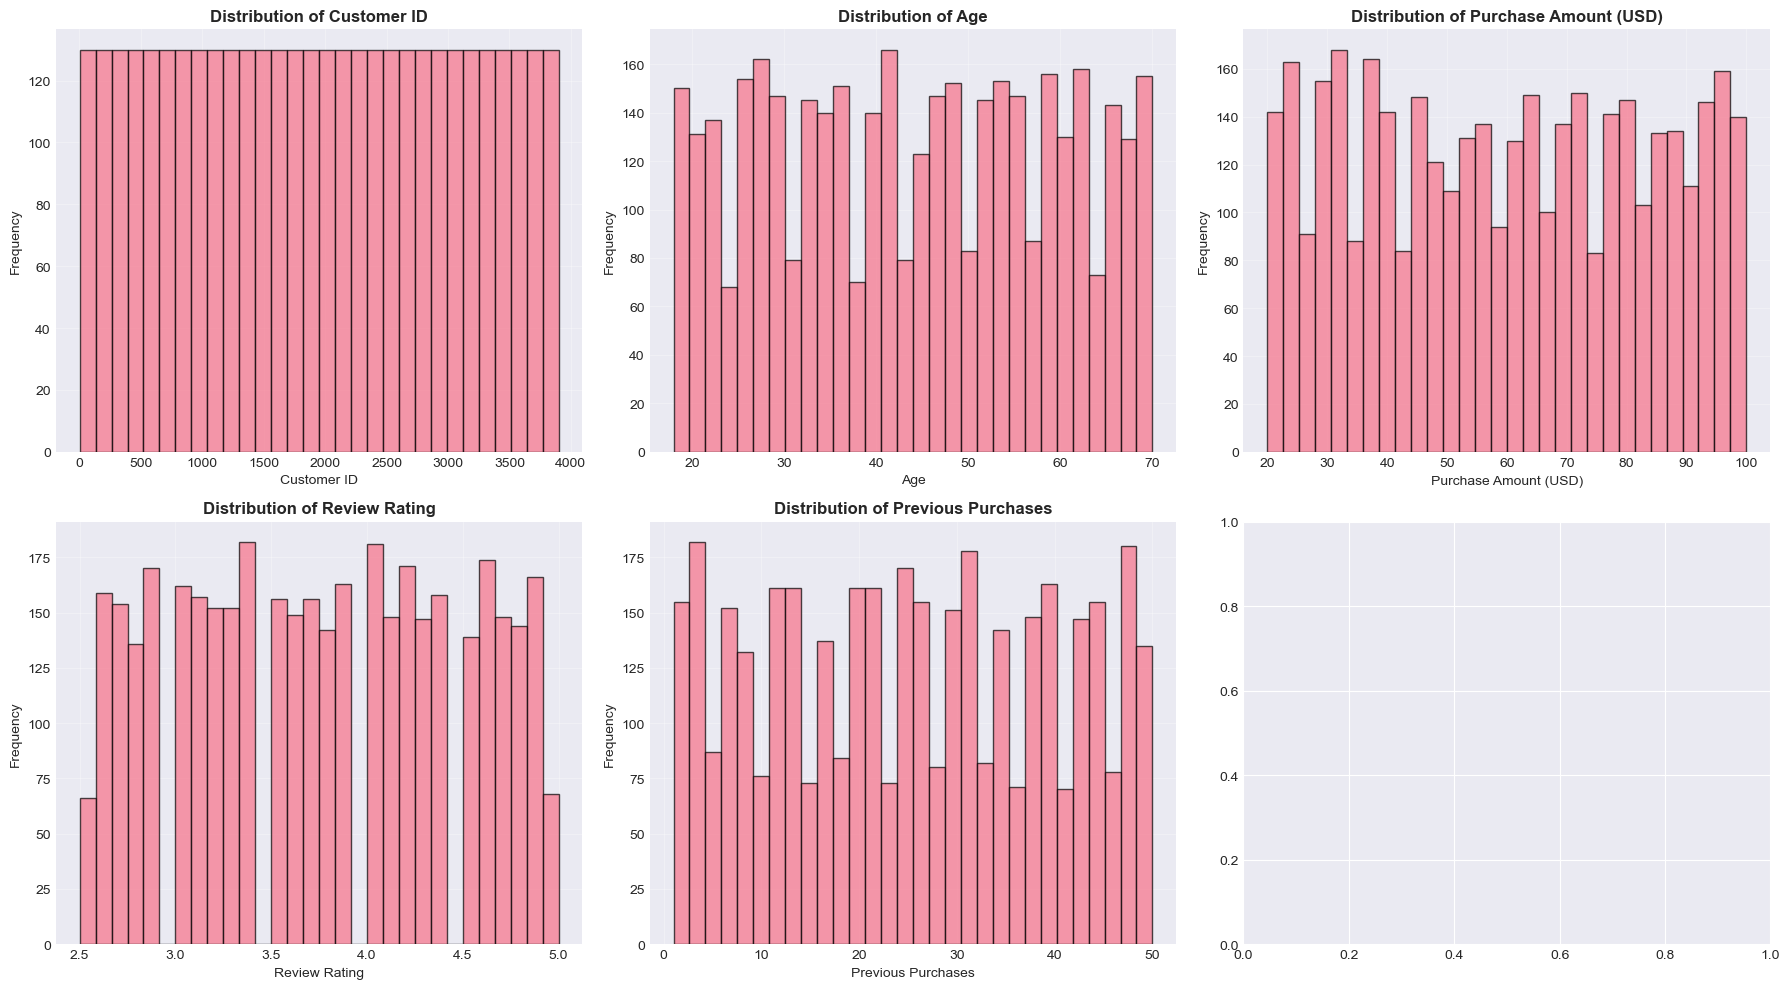

In [6]:
# Numerical columns distribution
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical Columns:", numerical_cols)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < 6:
        axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
# Categorical columns distribution
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical Columns ({len(categorical_cols)}): {categorical_cols}")

# Top categorical analysis
for col in categorical_cols[:6]:
    print(f"\n{col}:")
    print(df[col].value_counts().head(10))

Categorical Columns (13): ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']

Gender:
Gender
Male      2652
Female    1248
Name: count, dtype: int64

Item Purchased:
Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Name: count, dtype: int64

Category:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Location:
Location
Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Minnesota     88
Nebraska      87
New York      87
Nevada        87
Maryland      86
Name: count, dtype: int64

Size:
Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

Color:
Color
Olive     177
Yellow   

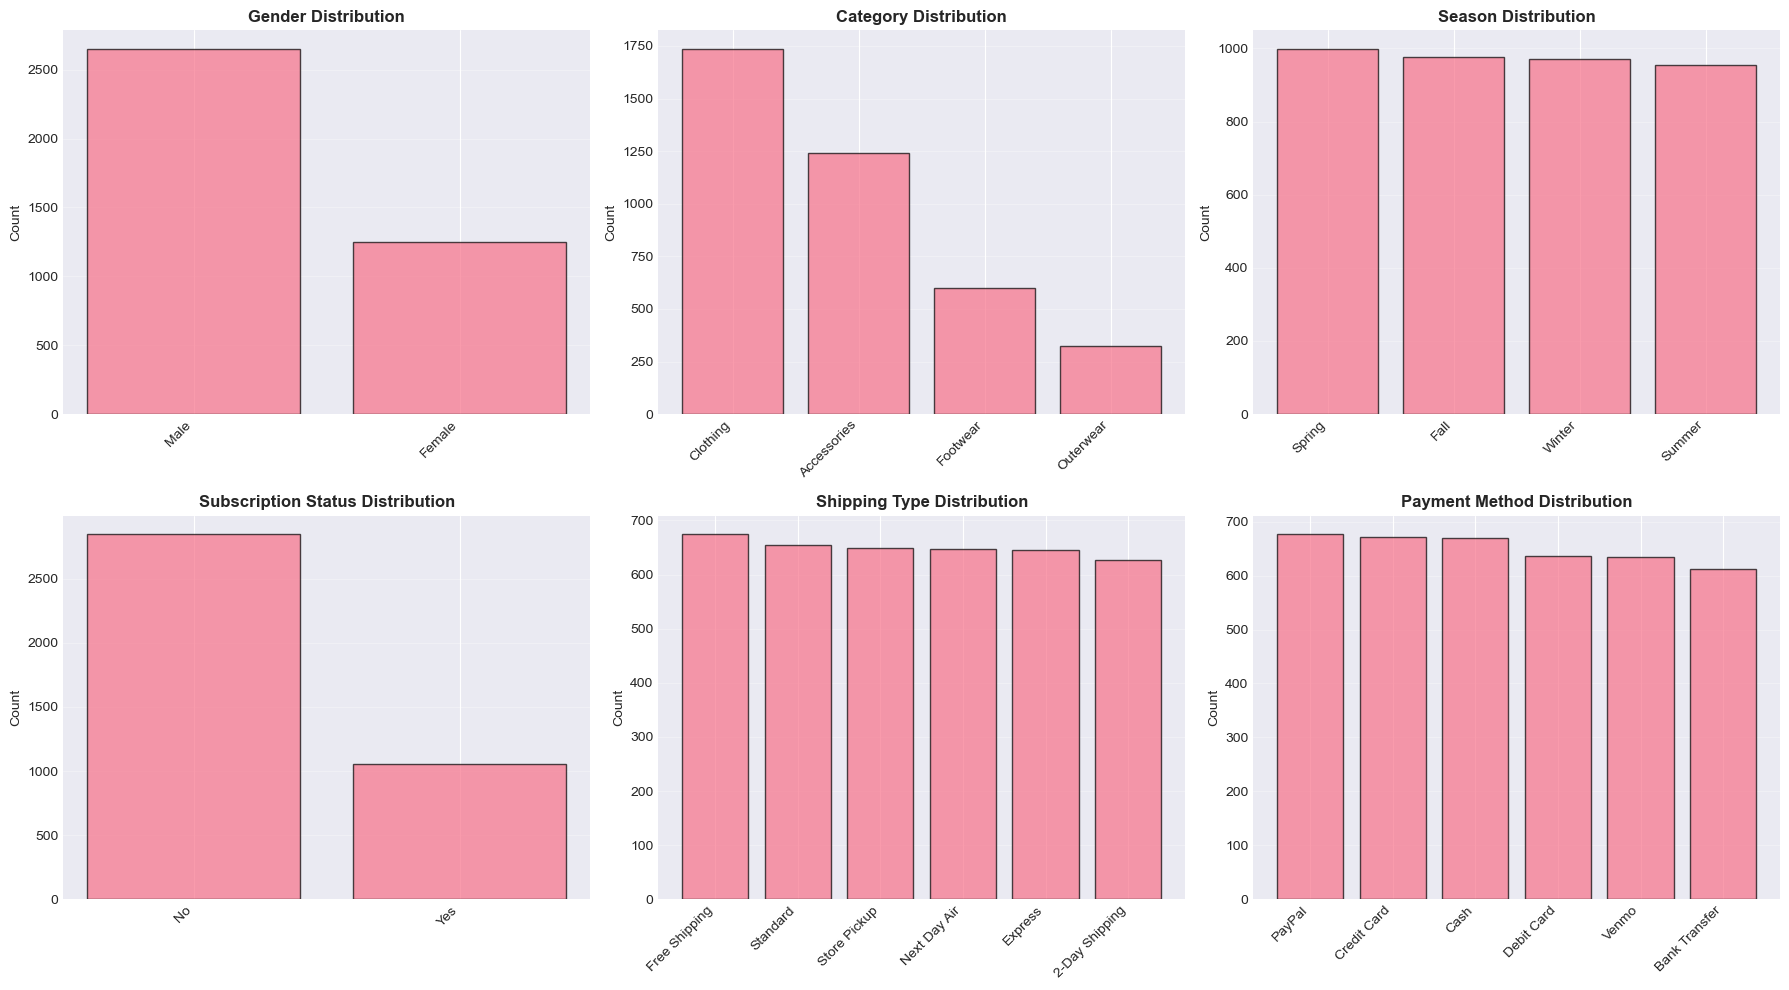

In [9]:
# Visualize key categorical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

plot_cols = ['Gender', 'Category', 'Season', 'Subscription Status', 'Shipping Type', 'Payment Method']

for idx, col in enumerate(plot_cols):
    if col in df.columns:
        value_counts = df[col].value_counts()
        axes[idx].bar(range(len(value_counts)), value_counts.values, edgecolor='black', alpha=0.7)
        axes[idx].set_xticks(range(len(value_counts)))
        axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
        axes[idx].set_title(f'{col} Distribution', fontweight='bold')
        axes[idx].set_ylabel('Count')
        axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Bivariate & Multivariate Analysis

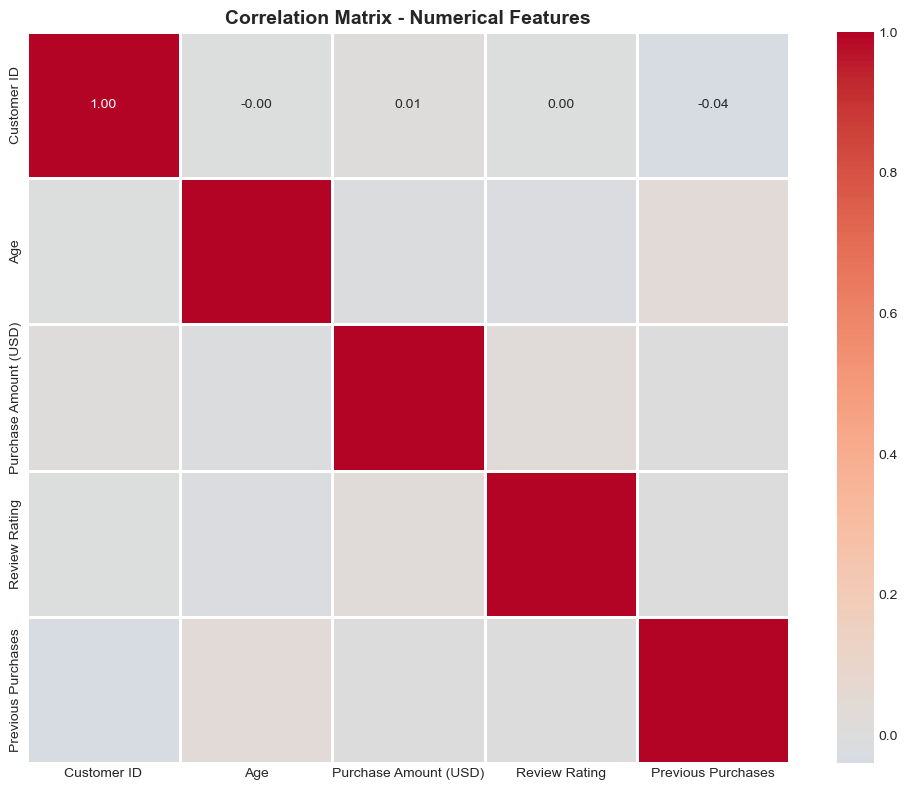

In [10]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=1)
plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

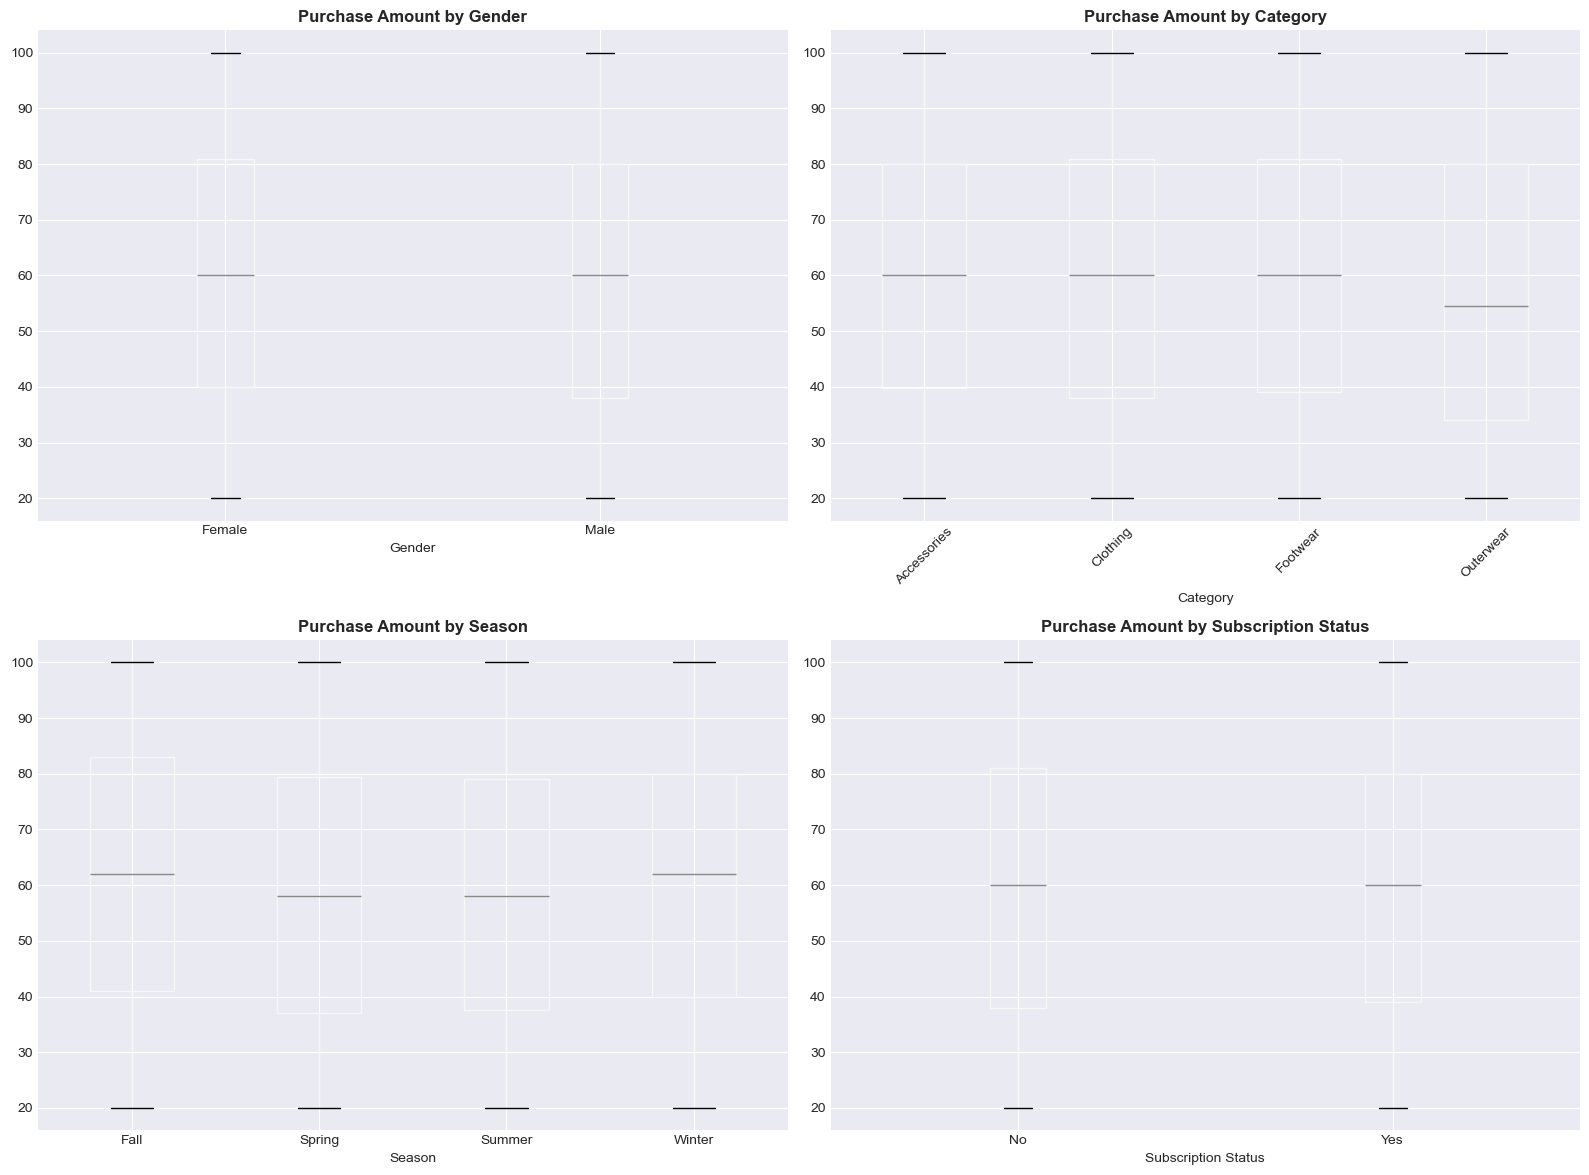

In [11]:
# Purchase Amount by different categories
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# By Gender
df.boxplot(column='Purchase Amount (USD)', by='Gender', ax=axes[0, 0])
axes[0, 0].set_title('Purchase Amount by Gender', fontweight='bold')
axes[0, 0].set_xlabel('Gender')

# By Category
df.boxplot(column='Purchase Amount (USD)', by='Category', ax=axes[0, 1])
axes[0, 1].set_title('Purchase Amount by Category', fontweight='bold')
axes[0, 1].set_xlabel('Category')
axes[0, 1].tick_params(axis='x', rotation=45)

# By Season
df.boxplot(column='Purchase Amount (USD)', by='Season', ax=axes[1, 0])
axes[1, 0].set_title('Purchase Amount by Season', fontweight='bold')
axes[1, 0].set_xlabel('Season')

# By Subscription Status
df.boxplot(column='Purchase Amount (USD)', by='Subscription Status', ax=axes[1, 1])
axes[1, 1].set_title('Purchase Amount by Subscription Status', fontweight='bold')
axes[1, 1].set_xlabel('Subscription Status')

plt.suptitle('')
plt.tight_layout()
plt.show()

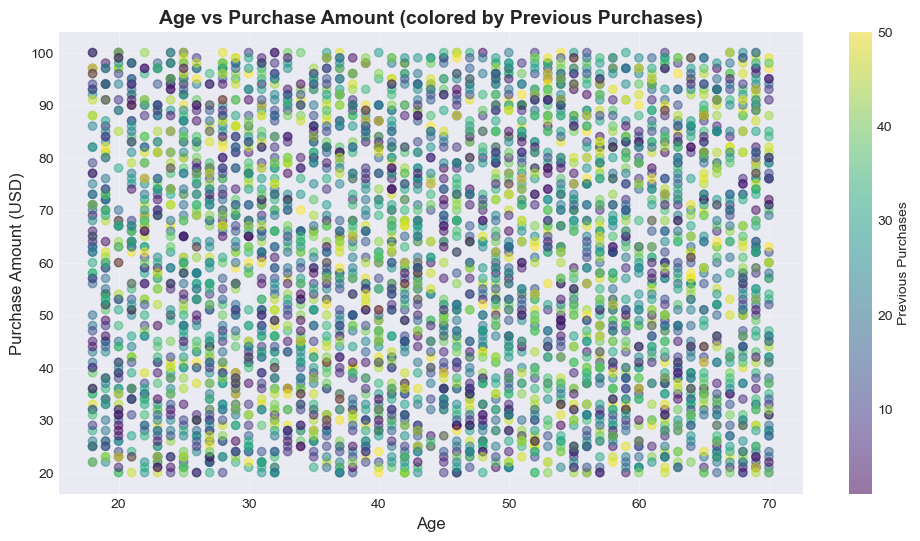

In [12]:
# Age vs Purchase Amount
plt.figure(figsize=(12, 6))
plt.scatter(df['Age'], df['Purchase Amount (USD)'], alpha=0.5, c=df['Previous Purchases'], cmap='viridis')
plt.colorbar(label='Previous Purchases')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Purchase Amount (USD)', fontsize=12)
plt.title('Age vs Purchase Amount (colored by Previous Purchases)', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.show()

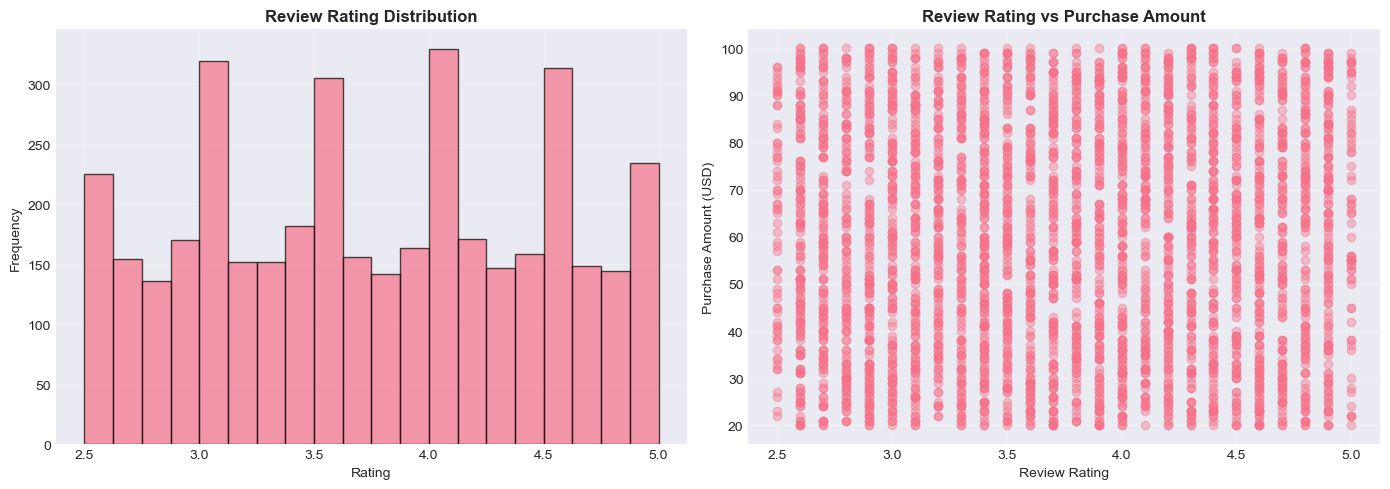

In [13]:
# Review Rating analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Rating distribution
axes[0].hist(df['Review Rating'], bins=20, edgecolor='black', alpha=0.7)
axes[0].set_title('Review Rating Distribution', fontweight='bold')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

# Rating vs Purchase Amount
axes[1].scatter(df['Review Rating'], df['Purchase Amount (USD)'], alpha=0.4)
axes[1].set_title('Review Rating vs Purchase Amount', fontweight='bold')
axes[1].set_xlabel('Review Rating')
axes[1].set_ylabel('Purchase Amount (USD)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Advanced Analysis

In [14]:
# Customer segments by purchase frequency
freq_purchase = df.groupby('Frequency of Purchases').agg({
    'Purchase Amount (USD)': ['mean', 'median', 'sum'],
    'Customer ID': 'count',
    'Previous Purchases': 'mean',
    'Review Rating': 'mean'
}).round(2)

print("Analysis by Purchase Frequency:\n")
print(freq_purchase)

Analysis by Purchase Frequency:

                       Purchase Amount (USD)               Customer ID  \
                                        mean median    sum       count   
Frequency of Purchases                                                   
Annually                               60.17   59.0  34419         572   
Bi-Weekly                              60.69   63.0  33200         547   
Every 3 Months                         60.08   60.0  35088         584   
Fortnightly                            59.05   58.5  32007         542   
Monthly                                59.33   58.0  32810         553   
Quarterly                              59.98   61.0  33771         563   
Weekly                                 58.97   58.0  31786         539   

                       Previous Purchases Review Rating  
                                     mean          mean  
Frequency of Purchases                                   
Annually                            24.56          3

In [15]:
# Discount impact analysis
discount_analysis = df.groupby('Discount Applied').agg({
    'Purchase Amount (USD)': ['mean', 'count'],
    'Review Rating': 'mean',
    'Subscription Status': lambda x: (x == 'Yes').sum()
}).round(2)

print("Discount Impact Analysis:\n")
print(discount_analysis)

Discount Impact Analysis:

                 Purchase Amount (USD)       Review Rating Subscription Status
                                  mean count          mean            <lambda>
Discount Applied                                                              
No                               60.13  2223          3.76                   0
Yes                              59.28  1677          3.74                1053


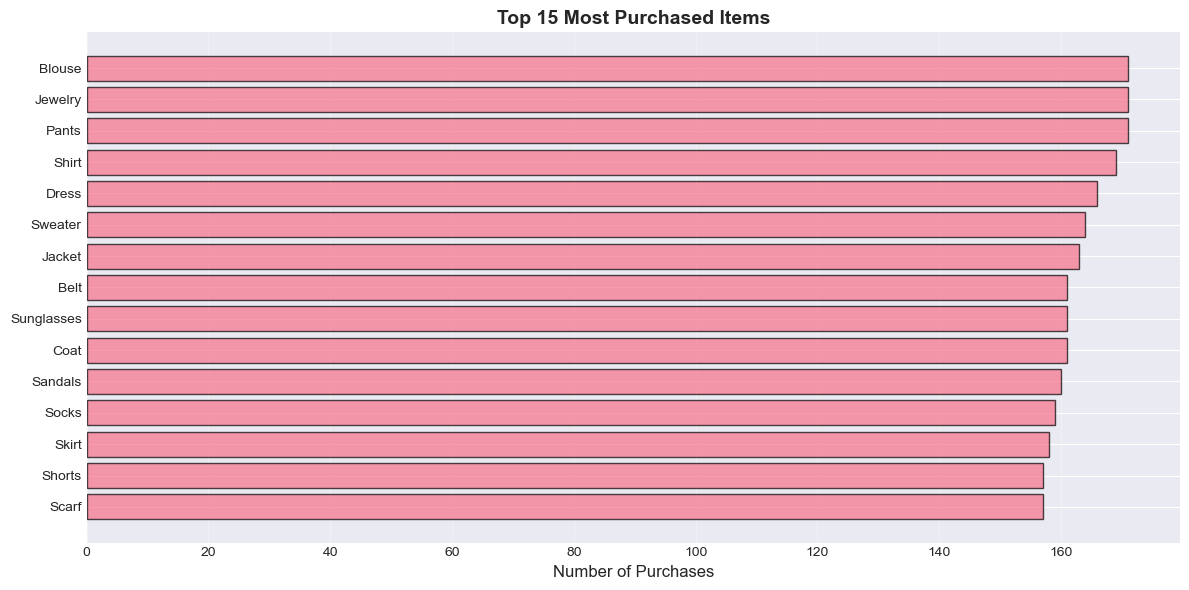

In [16]:
# Top selling items
top_items = df['Item Purchased'].value_counts().head(15)

plt.figure(figsize=(12, 6))
plt.barh(range(len(top_items)), top_items.values, edgecolor='black', alpha=0.7)
plt.yticks(range(len(top_items)), top_items.index)
plt.xlabel('Number of Purchases', fontsize=12)
plt.title('Top 15 Most Purchased Items', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Feature Engineering

In [17]:
# Create a copy for modeling
df_model = df.copy()

# Create new features
df_model['Is_Subscriber'] = (df_model['Subscription Status'] == 'Yes').astype(int)
df_model['Discount_Used'] = (df_model['Discount Applied'] == 'Yes').astype(int)
df_model['Promo_Used'] = (df_model['Promo Code Used'] == 'Yes').astype(int)

# Age groups
df_model['Age_Group'] = pd.cut(df_model['Age'], 
                                bins=[0, 25, 35, 50, 100], 
                                labels=['Young', 'Adult', 'Middle_Age', 'Senior'])

# Purchase amount categories
df_model['Purchase_Category'] = pd.cut(df_model['Purchase Amount (USD)'], 
                                        bins=[0, 30, 60, 100], 
                                        labels=['Low', 'Medium', 'High'])

print("New features created successfully!")
print(f"\nDataset shape after feature engineering: {df_model.shape}")
df_model.head()

New features created successfully!

Dataset shape after feature engineering: (3900, 23)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Is_Subscriber,Discount_Used,Promo_Used,Age_Group,Purchase_Category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Yes,14,Venmo,Fortnightly,1,1,1,Senior,Medium
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Yes,2,Cash,Fortnightly,1,1,1,Young,High
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Yes,23,Credit Card,Weekly,1,1,1,Middle_Age,High
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,Yes,49,PayPal,Weekly,1,1,1,Young,High
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Yes,31,PayPal,Annually,1,1,1,Middle_Age,Medium


## 6. Model 1: Purchase Amount Prediction (Regression)

In [18]:
# Prepare data for regression
df_reg = df_model.copy()

# Select features
feature_cols = ['Age', 'Previous Purchases', 'Review Rating', 'Is_Subscriber', 'Discount_Used', 'Promo_Used']
categorical_features = ['Gender', 'Category', 'Season', 'Shipping Type', 'Payment Method', 'Frequency of Purchases']

# Encode categorical variables
le_dict = {}
for col in categorical_features:
    le = LabelEncoder()
    df_reg[f'{col}_encoded'] = le.fit_transform(df_reg[col])
    le_dict[col] = le
    feature_cols.append(f'{col}_encoded')

# Prepare X and y
X = df_reg[feature_cols]
y = df_reg['Purchase Amount (USD)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (3120, 12)
Test set size: (780, 12)


In [19]:
# Train multiple regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=5)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'RMSE': rmse, 'R2': r2, 'predictions': y_pred}
    
    print(f"{name} - RMSE: {rmse:.2f}, R²: {r2:.4f}")

# Find best model
best_model_name = max(results, key=lambda x: results[x]['R2'])
print(f"\n🏆 Best Model: {best_model_name} with R² = {results[best_model_name]['R2']:.4f}")


Training Linear Regression...
Linear Regression - RMSE: 23.76, R²: -0.0092

Training Random Forest...
Random Forest - RMSE: 23.96, R²: -0.0258

Training Gradient Boosting...
Gradient Boosting - RMSE: 24.82, R²: -0.1007

🏆 Best Model: Linear Regression with R² = -0.0092


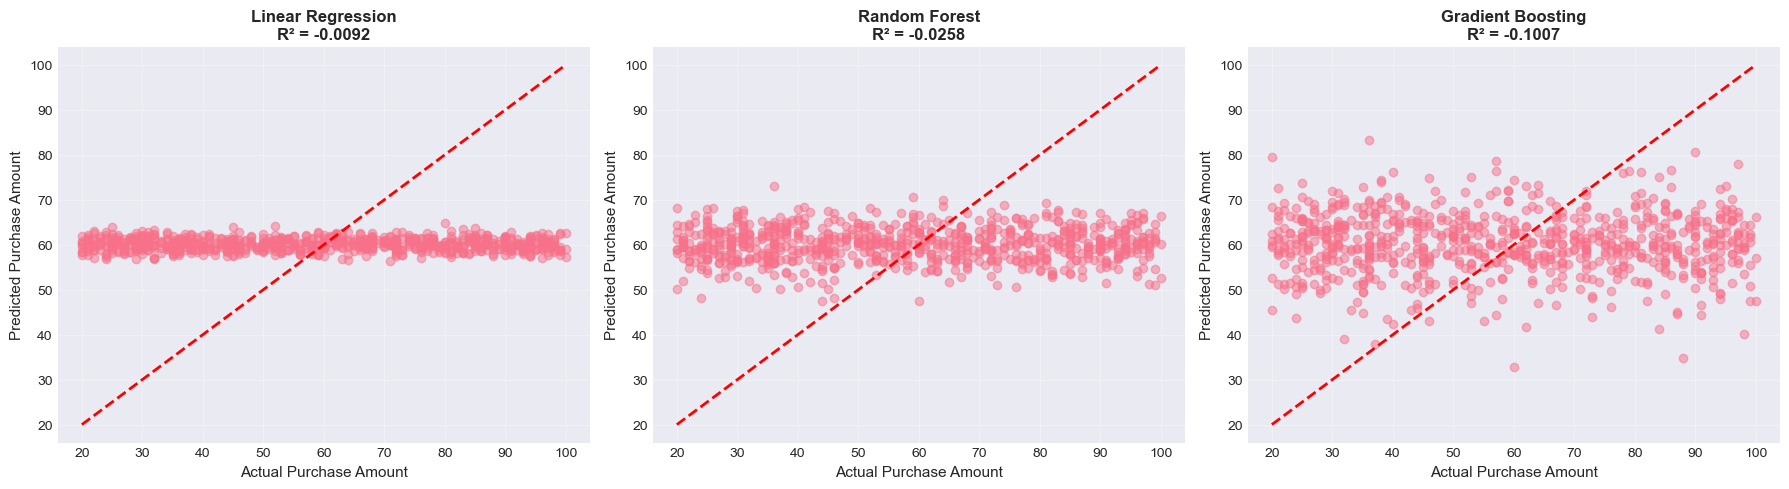

In [20]:
# Visualize predictions vs actual
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, result) in enumerate(results.items()):
    axes[idx].scatter(y_test, result['predictions'], alpha=0.5)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual Purchase Amount', fontsize=11)
    axes[idx].set_ylabel('Predicted Purchase Amount', fontsize=11)
    axes[idx].set_title(f'{name}\nR² = {result["R2"]:.4f}', fontweight='bold')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

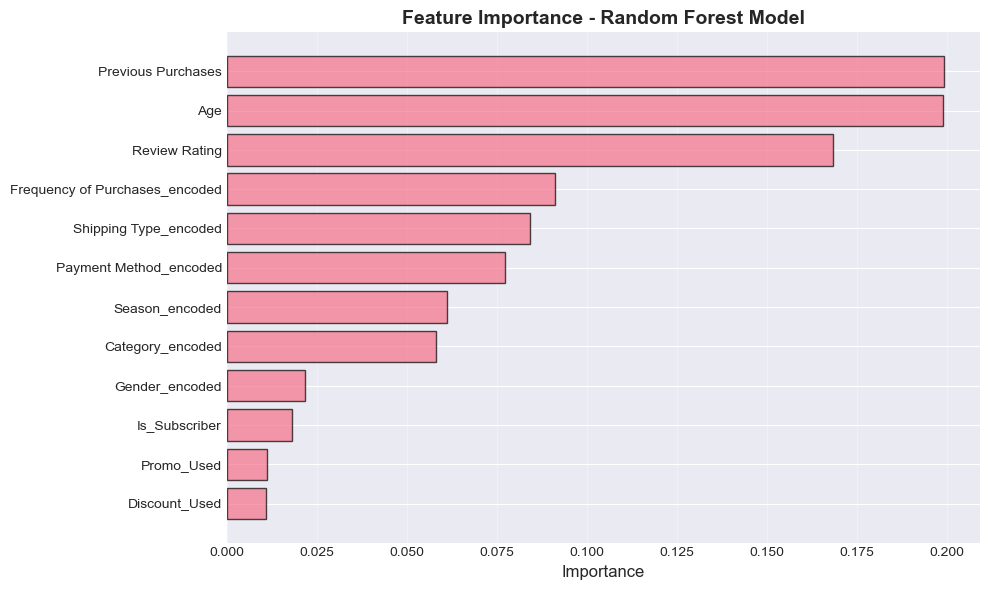


Top 10 Most Important Features:
                           feature  importance
1               Previous Purchases    0.199260
0                              Age    0.198872
2                    Review Rating    0.168319
11  Frequency of Purchases_encoded    0.091107
9            Shipping Type_encoded    0.084344
10          Payment Method_encoded    0.077283
8                   Season_encoded    0.061098
7                 Category_encoded    0.058044
6                   Gender_encoded    0.021631
3                    Is_Subscriber    0.018028


In [21]:
# Feature importance (for Random Forest)
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance['importance'], edgecolor='black', alpha=0.7)
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Importance', fontsize=12)
plt.title('Feature Importance - Random Forest Model', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

## 7. Model 2: Customer Segmentation (Clustering)

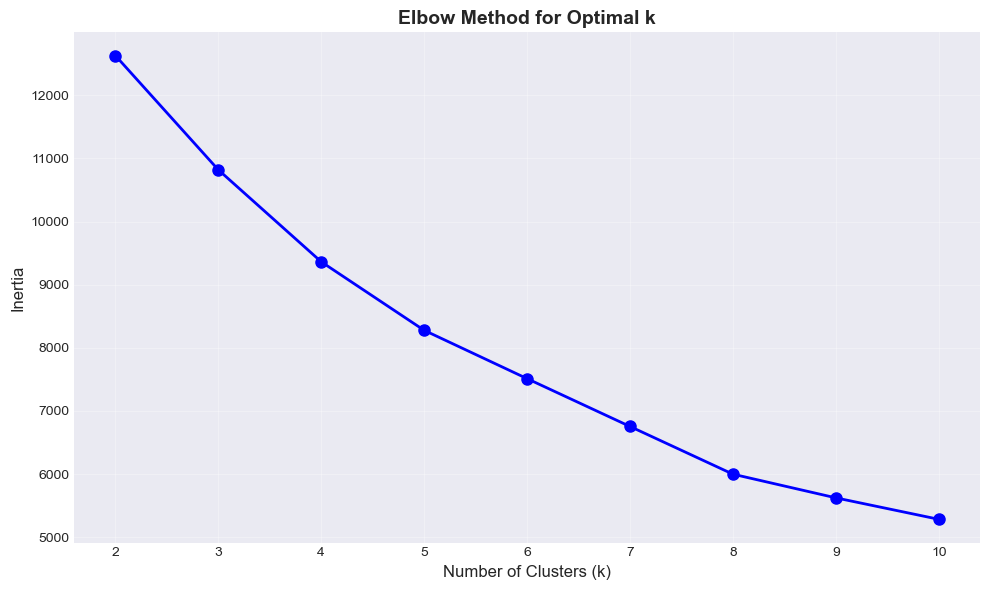

In [22]:
# Prepare data for clustering
clustering_features = ['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Review Rating']
X_cluster = df_model[clustering_features].copy()

# Scale the features
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# Elbow method to find optimal k
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [23]:
# Apply K-Means with optimal k (let's use k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_model['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

print(f"Customer distribution across clusters:\n{df_model['Cluster'].value_counts().sort_index()}")

Customer distribution across clusters:
Cluster
0    966
1    969
2    986
3    979
Name: count, dtype: int64


In [24]:
# Analyze clusters
cluster_analysis = df_model.groupby('Cluster').agg({
    'Age': 'mean',
    'Purchase Amount (USD)': ['mean', 'sum'],
    'Previous Purchases': 'mean',
    'Review Rating': 'mean',
    'Is_Subscriber': 'mean',
    'Customer ID': 'count'
}).round(2)

cluster_analysis.columns = ['Avg_Age', 'Avg_Purchase', 'Total_Revenue', 'Avg_Prev_Purchases', 
                            'Avg_Rating', 'Subscription_Rate', 'Customer_Count']
print("\nCluster Characteristics:\n")
print(cluster_analysis)


Cluster Characteristics:

         Avg_Age  Avg_Purchase  Total_Revenue  Avg_Prev_Purchases  Avg_Rating  \
Cluster                                                                         
0          56.22         82.08          79286               26.76        3.96   
1          31.33         54.86          53160               24.98        4.43   
2          32.59         64.76          63852               22.44        3.09   
3          56.26         37.57          36783               27.26        3.54   

         Subscription_Rate  Customer_Count  
Cluster                                     
0                     0.27             966  
1                     0.26             969  
2                     0.27             986  
3                     0.28             979  


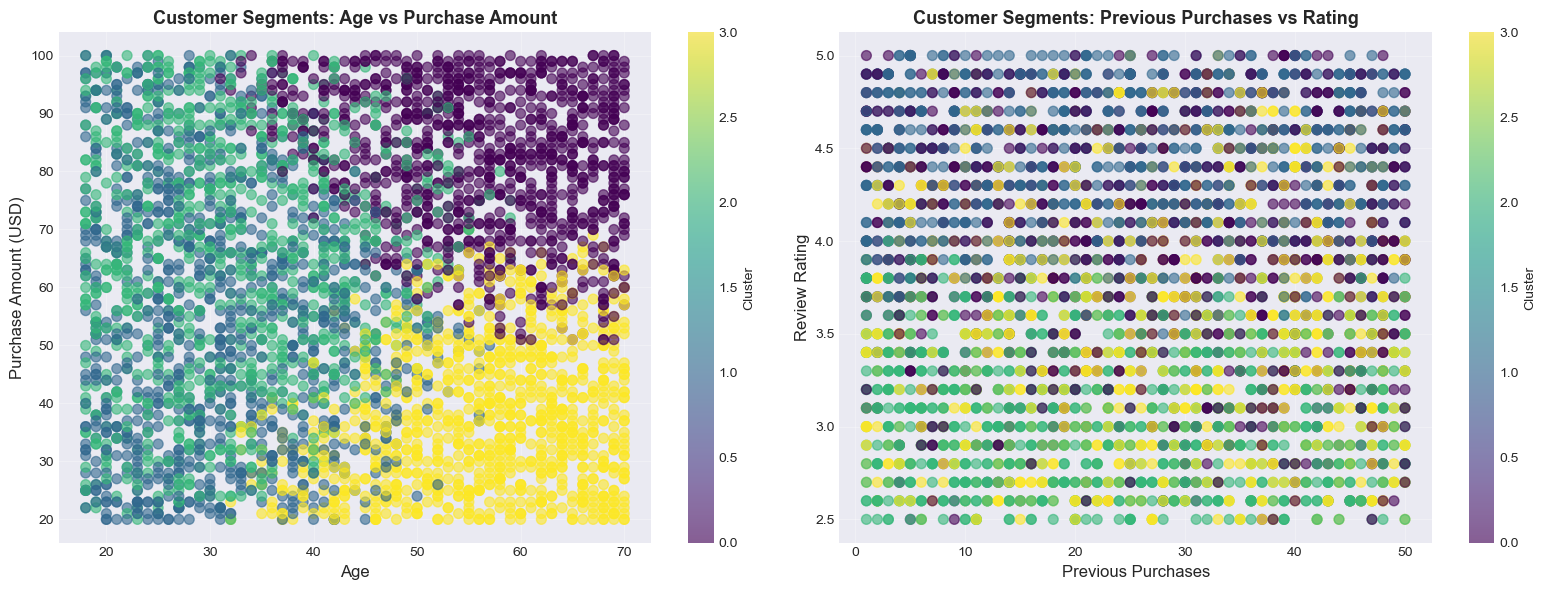

In [25]:
# Visualize clusters
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Age vs Purchase Amount
scatter1 = axes[0].scatter(df_model['Age'], df_model['Purchase Amount (USD)'], 
                          c=df_model['Cluster'], cmap='viridis', alpha=0.6, s=50)
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Purchase Amount (USD)', fontsize=12)
axes[0].set_title('Customer Segments: Age vs Purchase Amount', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Previous Purchases vs Review Rating
scatter2 = axes[1].scatter(df_model['Previous Purchases'], df_model['Review Rating'], 
                          c=df_model['Cluster'], cmap='viridis', alpha=0.6, s=50)
axes[1].set_xlabel('Previous Purchases', fontsize=12)
axes[1].set_ylabel('Review Rating', fontsize=12)
axes[1].set_title('Customer Segments: Previous Purchases vs Rating', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()

## 8. Model 3: Subscription Status Prediction (Classification)

In [37]:
# Prepare data for classification
df_class = df_model.copy()

# Base numeric features
class_features = [
    'Age', 
    'Purchase Amount (USD)', 
    'Previous Purchases', 
    'Review Rating', 
    'Discount_Used', 
    'Promo_Used'
]

# Automatically detect encoded categorical columns
encoded_cols = [col for col in df_class.columns if col.endswith("_encoded")]

# Combine features
class_features += encoded_cols

# Ensure all columns exist
missing = [col for col in class_features if col not in df_class.columns]
if missing:
    raise ValueError(f"Missing columns in df_model: {missing}")

X_class = df_class[class_features]
y_class = df_class['Is_Subscriber']

# Split data
from sklearn.model_selection import train_test_split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler_class = StandardScaler()
X_train_c_scaled = scaler_class.fit_transform(X_train_c)
X_test_c_scaled = scaler_class.transform(X_test_c)

print("Training set:", X_train_c.shape)
print("Test set:", X_test_c.shape)
print("\nClass distribution in training set:\n", y_train_c.value_counts())


Training set: (3120, 6)
Test set: (780, 6)

Class distribution in training set:
 Is_Subscriber
0    2289
1     831
Name: count, dtype: int64



Training Logistic Regression...

Classification Report for Logistic Regression:
                precision    recall  f1-score   support

Non-Subscriber       1.00      0.76      0.86       558
    Subscriber       0.62      1.00      0.77       222

      accuracy                           0.83       780
     macro avg       0.81      0.88      0.81       780
  weighted avg       0.89      0.83      0.83       780



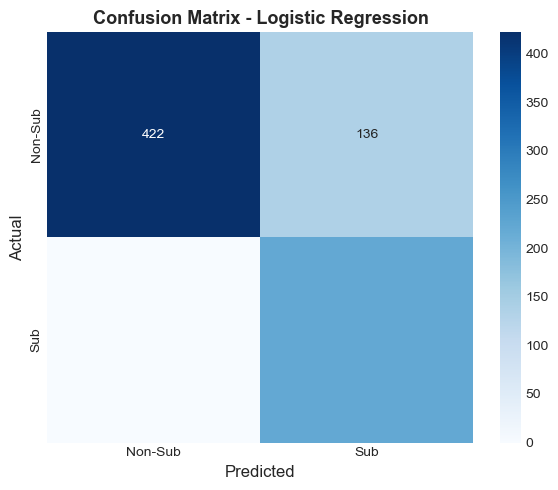


Training Random Forest...

Classification Report for Random Forest:
                precision    recall  f1-score   support

Non-Subscriber       0.96      0.78      0.86       558
    Subscriber       0.62      0.92      0.74       222

      accuracy                           0.82       780
     macro avg       0.79      0.85      0.80       780
  weighted avg       0.86      0.82      0.82       780



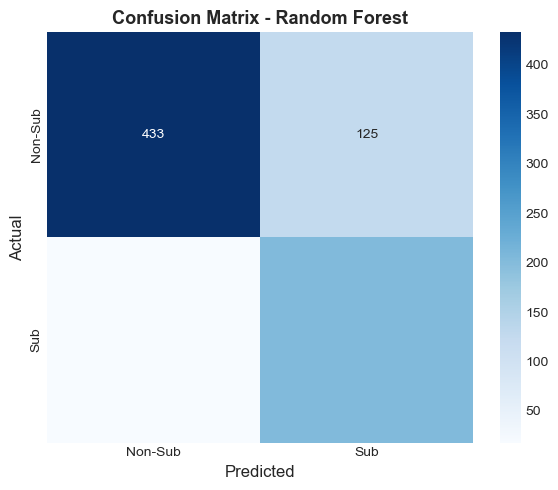

In [38]:
# Train classification models
class_models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
}

for name, model in class_models.items():
    print(f"\n{'='*60}")
    print(f"Training {name}...")
    model.fit(X_train_c_scaled, y_train_c)
    y_pred_c = model.predict(X_test_c_scaled)
    
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test_c, y_pred_c, target_names=['Non-Subscriber', 'Subscriber']))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_c, y_pred_c)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Sub', 'Sub'], 
                yticklabels=['Non-Sub', 'Sub'])
    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Predicted', fontsize=12)
    plt.title(f'Confusion Matrix - {name}', fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.show()

## 9. Key Insights & Recommendations

In [29]:
print("="*80)
print("KEY INSIGHTS FROM SHOPPING BEHAVIOR ANALYSIS")
print("="*80)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total Customers: {len(df)}")
print(f"   - Average Purchase Amount: ${df['Purchase Amount (USD)'].mean():.2f}")
print(f"   - Total Revenue: ${df['Purchase Amount (USD)'].sum():,.2f}")
print(f"   - Average Review Rating: {df['Review Rating'].mean():.2f}/5.0")

print("\n2. CUSTOMER DEMOGRAPHICS:")
print(f"   - Age Range: {df['Age'].min()} - {df['Age'].max()} years")
print(f"   - Average Age: {df['Age'].mean():.1f} years")
print(f"   - Gender Distribution: {dict(df['Gender'].value_counts())}")

print("\n3. PURCHASE PATTERNS:")
print(f"   - Subscription Rate: {(df['Subscription Status']=='Yes').sum()/len(df)*100:.1f}%")
print(f"   - Discount Usage: {(df['Discount Applied']=='Yes').sum()/len(df)*100:.1f}%")
print(f"   - Promo Code Usage: {(df['Promo Code Used']=='Yes').sum()/len(df)*100:.1f}%")

print("\n4. MODEL PERFORMANCE:")
print(f"   - Best Regression Model: {best_model_name}")
print(f"   - R² Score: {results[best_model_name]['R2']:.4f}")
print(f"   - RMSE: ${results[best_model_name]['RMSE']:.2f}")

print("\n5. CUSTOMER SEGMENTS:")
print(f"   - Number of Segments: {optimal_k}")
for i in range(optimal_k):
    cluster_data = cluster_analysis.iloc[i]
    print(f"\n   Segment {i}:")
    print(f"     - Size: {int(cluster_data['Customer_Count'])} customers")
    print(f"     - Avg Purchase: ${cluster_data['Avg_Purchase']:.2f}")
    print(f"     - Avg Age: {cluster_data['Avg_Age']:.1f} years")
    print(f"     - Subscription Rate: {cluster_data['Subscription_Rate']*100:.1f}%")

print("\n" + "="*80)
print("RECOMMENDATIONS:")
print("="*80)
print("\n1. Target high-value customer segments with personalized offers")
print("2. Increase subscription conversion through targeted campaigns")
print("3. Optimize discount strategies based on customer segments")
print("4. Focus on improving review ratings for better customer retention")
print("5. Develop loyalty programs for frequent purchasers")
print("="*80)

KEY INSIGHTS FROM SHOPPING BEHAVIOR ANALYSIS

1. DATASET OVERVIEW:
   - Total Customers: 3900
   - Average Purchase Amount: $59.76
   - Total Revenue: $233,081.00
   - Average Review Rating: 3.75/5.0

2. CUSTOMER DEMOGRAPHICS:
   - Age Range: 18 - 70 years
   - Average Age: 44.1 years
   - Gender Distribution: {'Male': 2652, 'Female': 1248}

3. PURCHASE PATTERNS:
   - Subscription Rate: 27.0%
   - Discount Usage: 43.0%
   - Promo Code Usage: 43.0%

4. MODEL PERFORMANCE:
   - Best Regression Model: Linear Regression
   - R² Score: -0.0092
   - RMSE: $23.76

5. CUSTOMER SEGMENTS:
   - Number of Segments: 4

   Segment 0:
     - Size: 966 customers
     - Avg Purchase: $82.08
     - Avg Age: 56.2 years
     - Subscription Rate: 27.0%

   Segment 1:
     - Size: 969 customers
     - Avg Purchase: $54.86
     - Avg Age: 31.3 years
     - Subscription Rate: 26.0%

   Segment 2:
     - Size: 986 customers
     - Avg Purchase: $64.76
     - Avg Age: 32.6 years
     - Subscription Rate: 27.0%



## 10. Export Results

In [30]:
# Save processed data with clusters
df_model.to_csv('shopping_behavior_with_clusters.csv', index=False)
print("✅ Saved: shopping_behavior_with_clusters.csv")

# Save cluster analysis
cluster_analysis.to_csv('cluster_analysis.csv')
print("✅ Saved: cluster_analysis.csv")

# Save feature importance
feature_importance.to_csv('feature_importance.csv', index=False)
print("✅ Saved: feature_importance.csv")

print("\n🎉 Analysis Complete! All results saved.")

✅ Saved: shopping_behavior_with_clusters.csv
✅ Saved: cluster_analysis.csv
✅ Saved: feature_importance.csv

🎉 Analysis Complete! All results saved.
